### Case Study: Log Parsing
### Domain: Telecom

In [ ]:
A telecom software provider is building an application to monitor different telecom 
components in the production environment. For monitoring purpose, the application 
relies on log files by parsing the log files and looking for potential warning or 
exceptions in the logs and reporting them.

The Dataset contains the log files from different components used in the overall 
telecom application.

Tasks:
The volume of data is quite large. As part of the R&D team, you are building a solution 
on spark to load and parse the multiple log files and then arranging the error and 
warning by the timestamp.

1. Load file as a text file in spark
2. Find out how many 404 HTTP codes are in access logs.
3. Find out which URLs are broken.
4. Verify there are no null columns in the original dataset.
5. Replace null values with constants such as 0
6. Parse timestamp to readable date.
7. Describe which HTTP status values appear in data and how many.
8. Display as chart the above stat in chart in Zeppelin notebook
9. How many unique hosts are there in the entire log and their average request
10.Create a spark-submit application for the same and print the findings in the log

In [2]:
import findspark
findspark.init()

import pyspark 
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Apple").getOrCreate()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
1. Load file as a text file in spark

In [4]:
df = spark.read.option("encoding", "windows-1252").csv('bjupm6tr0qi/651_m5_cs2_datasets_v1.0',inferSchema=True,sep=' ')
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)



In [168]:
df.show(1,truncate=False)

+---------------+---+---+---------------------+------+---+---------------+--------+---+----+----+-----------+--------+----+----+--------+--------------+------------+----+
|_c0            |_c1|_c2|_c3                  |_c4   |_c5|_c6            |_c7     |_c8|_c9 |_c10|_c11       |_c12    |_c13|_c14|_c15    |_c16          |_c17        |_c18|
+---------------+---+---+---------------------+------+---+---------------+--------+---+----+----+-----------+--------+----+----+--------+--------------+------------+----+
|109.169.248.247|-  |-  |[12/Dec/2015:18:25:11|+0100]|GET|/administrator/|HTTP/1.1|200|4263|-   |Mozilla/5.0|(Windows|NT  |6.0;|rv:34.0)|Gecko/20100101|Firefox/34.0|-   |
+---------------+---+---+---------------------+------+---+---------------+--------+---+----+----+-----------+--------+----+----+--------+--------------+------------+----+
only showing top 1 row



In [169]:
df.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18']

In [5]:
name_list = ['remote_host',
 '_c1',
 '_c2',
 'request_time',
 'request_zone',
 'request_type',
 'url',
 'web_version',
 'status',
 'bytes_setnt',
 '_c10',
 'UA1',
 'UA2',
 'UA3',
 'UA4',
 'UA5',
 'UA6',
 'UA7',
 '_c18']
df = df.toDF(*name_list)


In [72]:
#df = df.drop('_c1', '_c2', '_c10','_c18')

In [171]:
df.show(1)

+---------------+---+---+--------------------+------------+------------+---------------+-----------+------+-----------+----+-----------+--------+---+----+--------+--------------+------------+----+
|    remote_host|_c1|_c2|        request_time|request_zone|request_type|            url|web_version|status|bytes_setnt|_c10|        UA1|     UA2|UA3| UA4|     UA5|           UA6|         UA7|_c18|
+---------------+---+---+--------------------+------------+------------+---------------+-----------+------+-----------+----+-----------+--------+---+----+--------+--------------+------------+----+
|109.169.248.247|  -|  -|[12/Dec/2015:18:2...|      +0100]|         GET|/administrator/|   HTTP/1.1|   200|       4263|   -|Mozilla/5.0|(Windows| NT|6.0;|rv:34.0)|Gecko/20100101|Firefox/34.0|   -|
+---------------+---+---+--------------------+------------+------------+---------------+-----------+------+-----------+----+-----------+--------+---+----+--------+--------------+------------+----+
only showing to

In [6]:
from pyspark.sql.functions import concat,concat_ws
df = df.select("remote_host",
               '_c1',
               '_c2',
          concat_ws(' ',df['request_time'],df['request_zone']).alias('Time'),
          df['request_type'].alias('Type'),
         df['url'].alias('URL'),
         df['web_version'].alias('Web'),
         df['status'],
         df['bytes_setnt'].alias('Bytes'),
               '_c10',
         concat_ws(' ','UA1','UA2','UA3','UA4','UA5','UA6','UA7').alias('UserAgent'),
              '_c18')

In [173]:
df.show(10)

+---------------+---+---+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
|    remote_host|_c1|_c2|                Time|Type|                 URL|     Web|status|Bytes|                _c10|           UserAgent|_c18|
+---------------+---+---+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
|109.169.248.247|  -|  -|[12/Dec/2015:18:2...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
|109.169.248.247|  -|  -|[12/Dec/2015:18:2...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
|    46.72.177.4|  -|  -|[12/Dec/2015:18:3...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
|    46.72.177.4|  -|  -|[12/Dec/2015:18:3...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
| 83.1

In [7]:
df = df.replace('-',None,['_c1','_c2','_c10','_c18'])

In [8]:
df.show(5)

+---------------+----+----+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
|    remote_host| _c1| _c2|                Time|Type|                 URL|     Web|status|Bytes|                _c10|           UserAgent|_c18|
+---------------+----+----+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
|109.169.248.247|null|null|[12/Dec/2015:18:2...| GET|     /administrator/|HTTP/1.1|   200| 4263|                null|Mozilla/5.0 (Wind...|null|
|109.169.248.247|null|null|[12/Dec/2015:18:2...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|null|
|    46.72.177.4|null|null|[12/Dec/2015:18:3...| GET|     /administrator/|HTTP/1.1|   200| 4263|                null|Mozilla/5.0 (Wind...|null|
|    46.72.177.4|null|null|[12/Dec/2015:18:3...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind..

In [ ]:
2. Find out how many 404 HTTP codes are in access logs.

In [9]:
df.filter('status==404').count()

454178

In [ ]:
3. Find out which URLs are broken.

In [177]:
from pyspark.sql.functions import length

In [178]:
df.filter(length(df['url'])==0).count()

0

In [ ]:
4. Verify there are no null columns in the original dataset.

In [352]:
from pyspark.sql.functions import count,when
df.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+-----------+---+---+----+----+---+---+------+-----+----+---------+----+
|remote_host|_c1|_c2|Time|Type|URL|Web|status|Bytes|_c10|UserAgent|_c18|
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+
|          0|  0|  0|   0|   0|  0|  0|     0|    0|   0|        0|   0|
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+



In [180]:
df.count()

4676012

In [ ]:
there are 4 columns we can consider as cannot be used. We candrop them.

In [ ]:
5. Replace null values with constants such as 0

In [195]:
#df2 = df
df = df.fillna({'_c1':0,'_c2':0, '_c10':0, '_c18':0, 'web':0})
df.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+-----------+---+---+----+----+---+---+------+-----+----+---------+----+
|remote_host|_c1|_c2|Time|Type|URL|Web|status|Bytes|_c10|UserAgent|_c18|
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+
|          0|  0|  0|   0|   0|  0|  0|     0|    0|   0|        0|   0|
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+



In [193]:
6. Parse timestamp to readable date.

In [196]:
import datetime

In [351]:
from pyspark.sql.functions import date_format,to_timestamp,substring

df.select(to_timestamp(expr("substring(Time, 2, length(Time)-2)"),'dd/MMM/yyyy:HH:mm:ss x').alias("Parsed_Date")).show(truncate=False)

+-------------------+
|Parsed_Date        |
+-------------------+
|2015-12-12 18:25:11|
|2015-12-12 18:25:11|
|2015-12-12 18:31:08|
|2015-12-12 18:31:08|
|2015-12-12 18:31:25|
|2015-12-12 18:31:25|
|2015-12-12 18:32:10|
|2015-12-12 18:32:11|
|2015-12-12 18:32:56|
|2015-12-12 18:32:56|
|2015-12-12 18:33:51|
|2015-12-12 18:33:52|
|2015-12-12 18:36:16|
|2015-12-12 18:36:16|
|2015-12-12 18:38:42|
|2015-12-12 18:38:42|
|2015-12-12 18:38:55|
|2015-12-12 18:38:56|
|2015-12-12 18:39:27|
|2015-12-12 18:39:27|
+-------------------+
only showing top 20 rows



In [ ]:
7. Describe which HTTP status values appear in data and how many.

In [256]:
plot_df = df.groupBy('status').count()
plot_df.show()

+--------+-------+
|  status|  count|
+--------+-------+
|     200|2315662|
|     206|1879858|
|     501|    286|
|     404| 454178|
|     403|   4444|
|     412|     38|
|     303|    494|
|     500|   6504|
|     304|  12660|
|     405|    166|
|     301|   1238|
|     400|     46|
|     401|    306|
|HTTP/1.1|     26|
|     406|    106|
+--------+-------+



In [ ]:
8. Display as chart the above stat in chart in Zeppelin notebook

<Axes: xlabel='status'>

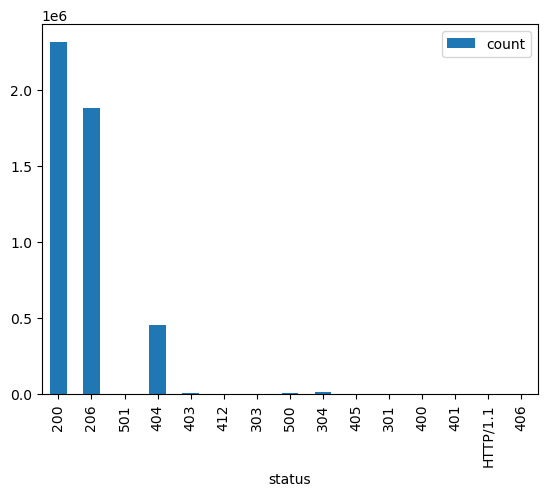

In [263]:
import matplotlib.pyplot as plt
import pyspark.pandas as ps

plot_pd = plot_df.toPandas()

plot_pd.plot.bar(x='status',y='count')



In [ ]:
9. How many unique hosts are there in the entire log and their average request

In [297]:
distinct_count = df.select(countDistinct('remote_host')).collect()[0][0]
distinct_count

40836

In [304]:
from pyspark.sql.functions import countDistinct

dist_df = df.groupBy('remote_host').agg(count('remote_host').alias('cnt'))

In [306]:
dist_df.show()

+--------------+---+
|   remote_host|cnt|
+--------------+---+
|   46.72.177.4| 16|
| 194.48.218.78|  4|
| 31.181.253.16|  4|
|  37.112.46.76|  4|
| 95.107.90.225|  4|
|  5.138.58.118|  4|
|95.188.228.228|  4|
|  66.7.119.112|  2|
| 145.255.2.176|  8|
| 176.59.208.95|  4|
| 62.133.162.65|  8|
| 95.29.129.235|  4|
|  66.249.64.64| 82|
| 207.46.13.165| 12|
| 180.76.15.162|150|
|  37.139.52.40| 32|
| 89.144.209.67| 52|
|23.106.216.107|  6|
|  195.20.125.6| 36|
| 92.113.63.101| 12|
+--------------+---+
only showing top 20 rows



In [309]:
from pyspark.sql.functions import avg
dist_df.select(avg('cnt')).show()

+------------------+
|          avg(cnt)|
+------------------+
|114.50710157703986|
+------------------+



In [ ]:
10.Create a spark-submit application for the same and print the findings in the log

In [ ]:
C:\Users\suzuk\Documents\edureka\PySpark Certification Training Course\Module 5>spark-submit CaseStudy2_submit.py
23/02/25 10:22:26 INFO SparkContext: Running Spark version 3.3.2
23/02/25 10:22:26 INFO ResourceUtils: ==============================================================
23/02/25 10:22:26 INFO ResourceUtils: No custom resources configured for spark.driver.
23/02/25 10:22:26 INFO ResourceUtils: ==============================================================
23/02/25 10:22:26 INFO SparkContext: Submitted application: Apple
23/02/25 10:22:26 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, amount: 1.0)
23/02/25 10:22:26 INFO ResourceProfile: Limiting resource is cpu
23/02/25 10:22:26 INFO ResourceProfileManager: Added ResourceProfile id: 0
23/02/25 10:22:26 INFO SecurityManager: Changing view acls to: suzuk
23/02/25 10:22:26 INFO SecurityManager: Changing modify acls to: suzuk
23/02/25 10:22:26 INFO SecurityManager: Changing view acls groups to:
23/02/25 10:22:26 INFO SecurityManager: Changing modify acls groups to:
23/02/25 10:22:26 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users  with view permissions: Set(suzuk); groups with view permissions: Set(); users  with modify permissions: Set(suzuk); groups with modify permissions: Set()
23/02/25 10:22:27 INFO Utils: Successfully started service 'sparkDriver' on port 52550.
23/02/25 10:22:27 INFO SparkEnv: Registering MapOutputTracker
23/02/25 10:22:27 INFO SparkEnv: Registering BlockManagerMaster
23/02/25 10:22:27 INFO BlockManagerMasterEndpoint: Using org.apache.spark.storage.DefaultTopologyMapper for getting topology information
23/02/25 10:22:27 INFO BlockManagerMasterEndpoint: BlockManagerMasterEndpoint up
23/02/25 10:22:27 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/02/25 10:22:27 INFO DiskBlockManager: Created local directory at C:\Users\suzuk\AppData\Local\Temp\blockmgr-1193409e-8948-4424-b887-be7d75d70cf5
23/02/25 10:22:27 INFO MemoryStore: MemoryStore started with capacity 366.3 MiB
23/02/25 10:22:27 INFO SparkEnv: Registering OutputCommitCoordinator
23/02/25 10:22:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/02/25 10:22:27 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/02/25 10:22:27 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
23/02/25 10:22:27 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
23/02/25 10:22:27 INFO Utils: Successfully started service 'SparkUI' on port 4044.
23/02/25 10:22:27 INFO Executor: Starting executor ID driver on host LAPTOP-TCJS4952
23/02/25 10:22:27 INFO Executor: Starting executor with user classpath (userClassPathFirst = false): ''
23/02/25 10:22:27 INFO Utils: Successfully started service 'org.apache.spark.network.netty.NettyBlockTransferService' on port 52601.
23/02/25 10:22:27 INFO NettyBlockTransferService: Server created on LAPTOP-TCJS4952:52601
23/02/25 10:22:27 INFO BlockManager: Using org.apache.spark.storage.RandomBlockReplicationPolicy for block replication policy
23/02/25 10:22:27 INFO BlockManagerMaster: Registering BlockManager BlockManagerId(driver, LAPTOP-TCJS4952, 52601, None)
23/02/25 10:22:27 INFO BlockManagerMasterEndpoint: Registering block manager LAPTOP-TCJS4952:52601 with 366.3 MiB RAM, BlockManagerId(driver, LAPTOP-TCJS4952, 52601, None)
23/02/25 10:22:27 INFO BlockManagerMaster: Registered BlockManager BlockManagerId(driver, LAPTOP-TCJS4952, 52601, None)
23/02/25 10:22:27 INFO BlockManager: Initialized BlockManager: BlockManagerId(driver, LAPTOP-TCJS4952, 52601, None)
1. Load file as a text file in spark
root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)

+---------------+---+---+---------------------+------+---+---------------+--------+---+----+----+-----------+--------+----+----+--------+--------------+------------+----+
|_c0            |_c1|_c2|_c3                  |_c4   |_c5|_c6            |_c7     |_c8|_c9 |_c10|_c11       |_c12    |_c13|_c14|_c15    |_c16          |_c17        |_c18|
+---------------+---+---+---------------------+------+---+---------------+--------+---+----+----+-----------+--------+----+----+--------+--------------+------------+----+
|109.169.248.247|-  |-  |[12/Dec/2015:18:25:11|+0100]|GET|/administrator/|HTTP/1.1|200|4263|-   |Mozilla/5.0|(Windows|NT  |6.0;|rv:34.0)|Gecko/20100101|Firefox/34.0|-   |
+---------------+---+---+---------------------+------+---+---------------+--------+---+----+----+-----------+--------+----+----+--------+--------------+------------+----+
only showing top 1 row

+---------------+---+---+--------------------+------------+------------+---------------+-----------+------+-----------+----+-----------+--------+---+----+--------+--------------+------------+----+
|    remote_host|_c1|_c2|        request_time|request_zone|request_type|            url|web_version|status|bytes_setnt|_c10|        UA1|     UA2|UA3| UA4|     UA5|           UA6|         UA7|_c18|
+---------------+---+---+--------------------+------------+------------+---------------+-----------+------+-----------+----+-----------+--------+---+----+--------+--------------+------------+----+
|109.169.248.247|  -|  -|[12/Dec/2015:18:2...|      +0100]|         GET|/administrator/|   HTTP/1.1|   200|       4263|   -|Mozilla/5.0|(Windows| NT|6.0;|rv:34.0)|Gecko/20100101|Firefox/34.0|   -|
+---------------+---+---+--------------------+------------+------------+---------------+-----------+------+-----------+----+-----------+--------+---+----+--------+--------------+------------+----+
only showing top 1 row

+---------------+---+---+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
|    remote_host|_c1|_c2|                Time|Type|                 URL|     Web|status|Bytes|                _c10|           UserAgent|_c18|
+---------------+---+---+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
|109.169.248.247|  -|  -|[12/Dec/2015:18:2...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
|109.169.248.247|  -|  -|[12/Dec/2015:18:2...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
|    46.72.177.4|  -|  -|[12/Dec/2015:18:3...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
|    46.72.177.4|  -|  -|[12/Dec/2015:18:3...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
| 83.167.113.100|  -|  -|[12/Dec/2015:18:3...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
| 83.167.113.100|  -|  -|[12/Dec/2015:18:3...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
|   95.29.198.15|  -|  -|[12/Dec/2015:18:3...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
|   95.29.198.15|  -|  -|[12/Dec/2015:18:3...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
|  109.184.11.34|  -|  -|[12/Dec/2015:18:3...| GET|     /administrator/|HTTP/1.1|   200| 4263|                   -|Mozilla/5.0 (Wind...|   -|
|  109.184.11.34|  -|  -|[12/Dec/2015:18:3...|POST|/administrator/in...|HTTP/1.1|   200| 4494|http://almhuette-...|Mozilla/5.0 (Wind...|   -|
+---------------+---+---+--------------------+----+--------------------+--------+------+-----+--------------------+--------------------+----+
only showing top 10 rows

****************************************************************************************************
2. Find out how many 404 HTTP codes are in access logs.
****************************************************************************************************
46
****************************************************************************************************
3. Find out which URLs are broken.
****************************************************************************************************
0
****************************************************************************************************
4. Verify there are no null columns in the original dataset.
****************************************************************************************************
23/02/25 10:22:38 WARN ProcfsMetricsGetter: Exception when trying to compute pagesize, as a result reporting of ProcessTree metrics is stopped
+-----------+-------+-------+----+----+---+---+------+-----+-------+---------+-------+
|remote_host|    _c1|    _c2|Time|Type|URL|Web|status|Bytes|   _c10|UserAgent|   _c18|
+-----------+-------+-------+----+----+---+---+------+-----+-------+---------+-------+
|          0|4676012|4675744|   0|   0|  0| 26|     0|    0|1355742|        0|1593208|
+-----------+-------+-------+----+----+---+---+------+-----+-------+---------+-------+

4676012
There are 4 columns we can consider as cannot be used. We candrop them.
****************************************************************************************************
5. Replace null values with constants such as 0
****************************************************************************************************
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+
|remote_host|_c1|_c2|Time|Type|URL|Web|status|Bytes|_c10|UserAgent|_c18|
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+
|          0|  0|  0|   0|   0|  0|  0|     0|    0|   0|        0|   0|
+-----------+---+---+----+----+---+---+------+-----+----+---------+----+

****************************************************************************************************
6. Parse timestamp to readable date.
****************************************************************************************************
+-------------------+
|Parsed_Date        |
+-------------------+
|2015-12-12 18:25:11|
|2015-12-12 18:25:11|
|2015-12-12 18:31:08|
|2015-12-12 18:31:08|
|2015-12-12 18:31:25|
|2015-12-12 18:31:25|
|2015-12-12 18:32:10|
|2015-12-12 18:32:11|
|2015-12-12 18:32:56|
|2015-12-12 18:32:56|
|2015-12-12 18:33:51|
|2015-12-12 18:33:52|
|2015-12-12 18:36:16|
|2015-12-12 18:36:16|
|2015-12-12 18:38:42|
|2015-12-12 18:38:42|
|2015-12-12 18:38:55|
|2015-12-12 18:38:56|
|2015-12-12 18:39:27|
|2015-12-12 18:39:27|
+-------------------+
only showing top 20 rows

****************************************************************************************************
7. Describe which HTTP status values appear in data and how many.
****************************************************************************************************
+--------+-------+
|  status|  count|
+--------+-------+
|     200|2315662|
|     206|1879858|
|     501|    286|
|     404| 454178|
|     403|   4444|
|     412|     38|
|     303|    494|
|     500|   6504|
|     304|  12660|
|     405|    166|
|     301|   1238|
|     400|     46|
|     401|    306|
|HTTP/1.1|     26|
|     406|    106|
+--------+-------+

****************************************************************************************************
8. Display as chart the above stat in chart in Zeppelin notebook
****************************************************************************************************
****************************************************************************************************
9. How many unique hosts are there in the entire log and their average request
****************************************************************************************************
Distinct hosts count 40836
+------------------+
|          avg(cnt)|
+------------------+
|114.50710157703986|
+------------------+